In [192]:
import pandas as pd
import ast
import os
import numpy as np

os.chdir("C:/Users/Wan Hok Ming/Documents/Applied Policy Project/Crunchbase")

investment = pd.read_csv("investment cleaned final.csv")
investment['Industries_list'] = investment['Industries_list'].apply(lambda x: ast.literal_eval(x))
investment['industry group list'] = investment['industry group list'].apply(lambda x: ast.literal_eval(x))
investment['17 Industry Categories'] = investment['17 Industry Categories'].apply(lambda x: ast.literal_eval(x))
investment = investment.iloc[:, 1:]



In [193]:
type(investment['17 Industry Categories'][0])

list

In [ ]:
investment

In [195]:
# restrict investment made from 2016-2024

target_investment = investment[investment["Announced Year"] > 2015]
target_investment["Domestic/Global"] = target_investment['Country']

target_investment.loc[target_investment['Country'] == "Saudi Arabia", 'Domestic/Global'] = 'Domestic'
target_investment.loc[target_investment['Country'] != "Saudi Arabia", 'Domestic/Global'] = 'Global'
target_investment

C:\Users\Wan Hok Ming\AppData\Local\Temp\ipykernel_38040\3770331411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_investment["Domestic/Global"] = target_investment['Country']


,Investor,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised,Location,Industries,Money Raised (Currency Type),Money Raised (Values),Money Raised (Values in USD),Industries_list,industry group list,17 Industry Categories,Country,Announced Year,City,Money Raised Normalized (Values in USD),Domestic/Global
0,Abdul Latif Jameel,2022-10-13,Figopara,NaN,Series A - Figopara,$11M,"Istanbul, Istanbul, Turkey",Finance\nFinancial Services\nFinTech\nSoftware,USD,1.100000e+07,1.100000e+07,"[Finance, Financial Services, FinTech, Software]","[Financial Services, Financial Services, Finan...","[Finance, Information Technology]",Turkey,2022,Istanbul,5.500000e+06,Global
1,Abdul Latif Jameel,2021-01-19,Rivian,NaN,Series F - Rivian,$2.7B,"Plymouth, Michigan, United States",Automotive\nElectric Vehicle\nManufacturing\nT...,USD,2.700000e+09,2.700000e+09,"[Automotive, Electric Vehicle, Manufacturing, ...","[Manufacturing, Transportation, Transportation...","[Transportation, Manufacturing and Agriculture]",United States,2021,Plymouth,1.350000e+09,Global
2,Abdul Latif Jameel,2020-12-14,Rain,NaN,Series A - Rain,$9.4M,"Manama, Al Manamah, Bahrain",Bitcoin\nCryptocurrency\nFinancial Exchanges\n...,USD,9.400000e+06,9.400000e+06,"[Bitcoin, Cryptocurrency, Financial Exchanges,...","[Blockchain and Cryptocurrency, Blockchain and...","[Finance, Information Technology]",Bahrain,2020,Manama,4.700000e+06,Global
3,Abdul Latif Jameel,2020-12-08,Tabby,NaN,Series A - Tabby,$23M,"Riyadh, Ar Riyad, Saudi Arabia",Billing\nFinance\nFinancial Services\nFinTech\...,USD,2.300000e+07,2.300000e+07,"[Billing, Finance, Financial Services, FinTech...","[Financial Services, Financial Services, Finan...","[Finance, Information Technology]",Saudi Arabia,2020,Riyadh,1.150000e+07,Domestic
4,Abdul Latif Jameel,2020-01-16,Joby Aviation,NaN,Series C - Joby Aviation,$590M,"Santa Cruz, California, United States",Aerospace\nAir Transportation\nElectric Vehicl...,USD,5.900000e+08,5.900000e+08,"[Aerospace, Air Transportation, Electric Vehic...","[Science and Engineering, Transportation, Tran...","[Transportation, Engineering and Biotech]",United States,2020,Santa Cruz,2.950000e+08,Global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,Zaeem Shaukat Mirza,2020-05-10,Manzil,No,Seed Round - Manzil,CA$617.1K,"Toronto, Ontario, Canada",Banking\nDebit Cards\nFinancial Exchanges\nFin...,CAN,6.171000e+05,4.537500e+05,"[Banking, Debit Cards, Financial Exchanges, Fi...","[Financial Services, Financial Services, Finan...",[Finance],Canada,2020,Toronto,4.537500e+05,Global
1053,Zamil Group,2022-02-10,Lyve Global,NaN,Convertible Note - Lyve Global,$50M,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Information Technology\nLogistics\nSaaS,USD,5.000000e+07,5.000000e+07,"[Information Technology, Logistics, SaaS]","[Information Technology, Software, Transportat...","[Transportation, Information Technology]",United Arab Emirates,2022,Abu Dhabi,2.500000e+07,Global
1054,Zamil Group,2021-02-23,Tarabut,NaN,Seed Round - Tarabut,$13M,"Dubai, Dubai, United Arab Emirates",Banking\nFinancial Services\nFinTech,USD,1.300000e+07,1.300000e+07,"[Banking, Financial Services, FinTech]","[Financial Services, Financial Services, Finan...",[Finance],United Arab Emirates,2021,Dubai,1.300000e+07,Global
1055,Zamil Group,2020-06-04,Lyve Global,NaN,Series B - Lyve Global,$35M,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Information Technology\nLogistics\nSaaS,USD,3.500000e+07,3.500000e+07,"[Information Technology, Logistics, SaaS]","[Information Technology, Software, Transportat...","[Transportation, Information Technology]",United Arab Emirates,2020,Abu Dhabi,1.750000e+07,Global


In [ ]:
invest_per_ind = target_investment.explode("17 Industry Categories")
invest_per_ind = invest_per_ind.groupby(['17 Industry Categories', 'Domestic/Global'])['Money Raised Normalized (Values in USD)'].sum()
invest_per_ind = pd.DataFrame(invest_per_ind)
invest_per_ind = invest_per_ind.reset_index()
invest_per_ind

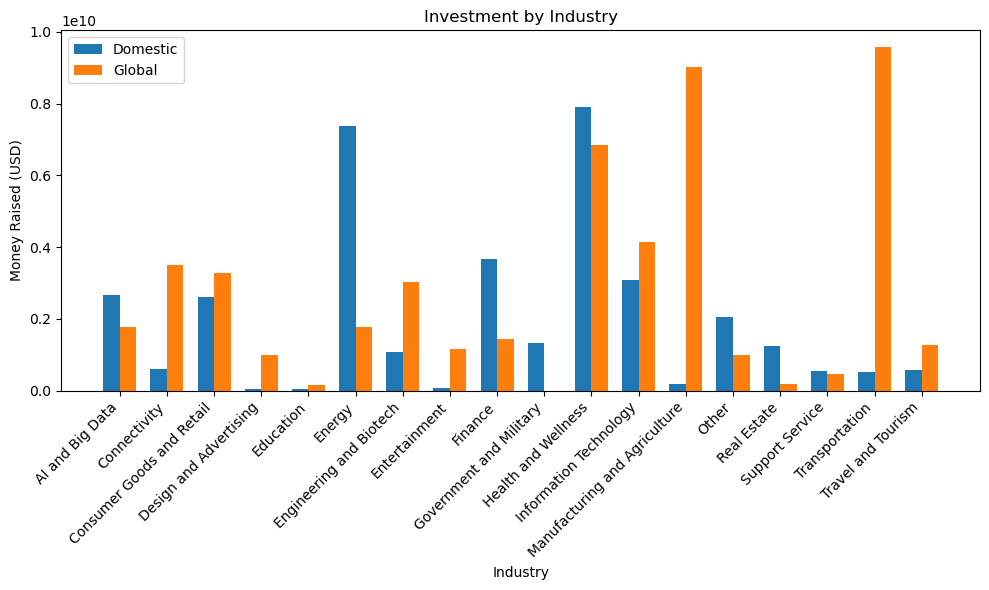

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming invest_per_ind is your DataFrame

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique categories and domestic/global values
categories = invest_per_ind['17 Industry Categories'].unique()
domestic_global_values = invest_per_ind['Domestic/Global'].unique()

# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
x = np.arange(len(categories))

# Iterate over domestic/global values to create grouped bars
for i, domestic_global in enumerate(domestic_global_values):
    # Get data for current domestic/global value
    data = invest_per_ind[invest_per_ind['Domestic/Global'] == domestic_global]['Money Raised Normalized (Values in USD)']
    
    # Plot bars
    ax.bar(x + i * bar_width, data, width=bar_width, label=domestic_global)

# Add labels, title, and legend
ax.set_xlabel('Industry')
ax.set_ylabel('Money Raised (USD)')
ax.set_title('Investment by Industry')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Show plot
plt.xticks(rotation=45, ha = 'right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [159]:
from collections import Counter
invest_loc = Counter(investment['Country'])
invest_loc = pd.DataFrame(invest_loc.items(), columns=['Country', 'Number'])
invest_loc

,Country,Number
0,Turkey,3
1,United States,169
2,Bahrain,22
3,Saudi Arabia,488
4,United Arab Emirates,138
5,Singapore,6
6,Ethiopia,2
7,Egypt,64
8,Pakistan,6
9,United Kingdom,25


In [204]:
glob_invest_cou_prop = target_investment.explode("17 Industry Categories")
glob_invest_cou_prop= glob_invest_cou_prop.groupby(['Country'])['Money Raised Normalized (Values in USD)'].sum()
glob_invest_cou_prop= pd.DataFrame(glob_invest_cou_prop)
glob_invest_cou_prop= glob_invest_cou_prop.reset_index()
glob_invest_cou_prop= glob_invest_cou_prop[glob_invest_cou_prop['Country'] !='Saudi Arabia']
glob_invest_cou_prop

,Country,Money Raised Normalized (Values in USD)
0,Australia,9.800000e+07
1,Azerbaijan,5.000000e+04
2,Bahrain,1.253475e+08
3,Belgium,1.521739e+07
4,Brazil,4.277193e+09
5,Canada,1.702991e+08
6,China,4.208102e+09
7,Egypt,4.462572e+08
8,Estonia,1.050000e+06
9,Ethiopia,4.000000e+05


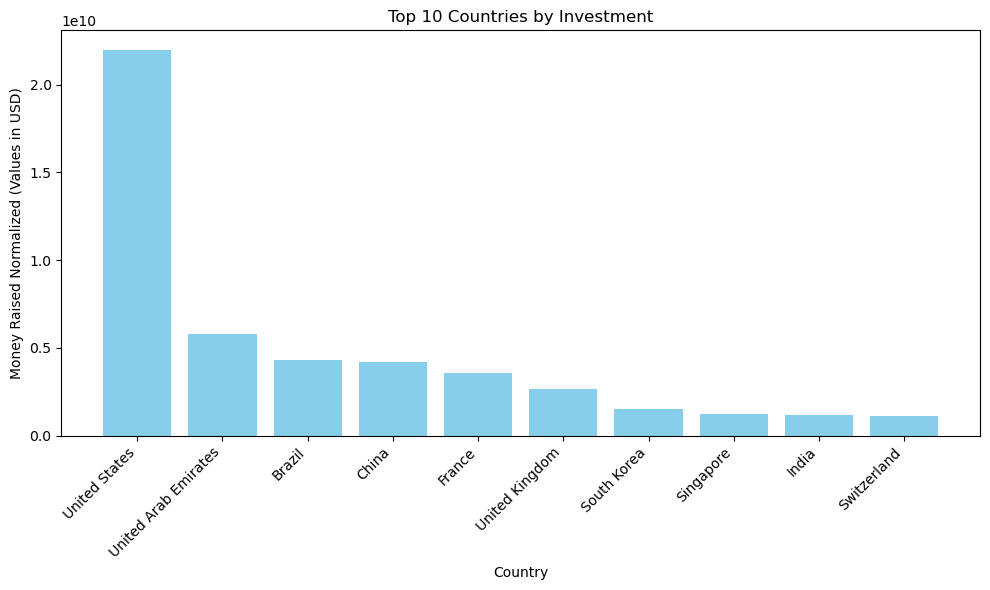

In [237]:
import matplotlib.pyplot as plt

glob_invest_cou_prop_sorted = glob_invest_cou_prop.sort_values(by='Money Raised Normalized (Values in USD)', ascending=False)
top_5_countries = glob_invest_cou_prop_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['Country'], top_5_countries['Money Raised Normalized (Values in USD)'], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Money Raised Normalized (Values in USD)')
plt.title('Top 10 Countries by Investment')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [234]:
# Size of local Investment by country and industry categories (Top 10)

country_order = ['United States', 'United Arab Emirates', 'Brazil', 'China', 'France', 'United Kingdom', 'South Korea', 'Singapore', 'India', 'Switzerland']

glob_invest_per_cou = target_investment.explode("17 Industry Categories")
glob_invest_per_cou= glob_invest_per_cou.groupby(['Country','17 Industry Categories'])['Money Raised Normalized (Values in USD)'].sum()
glob_invest_per_cou= pd.DataFrame(glob_invest_per_cou)
glob_invest_per_cou= glob_invest_per_cou.reset_index()
glob_invest_per_cou= glob_invest_per_cou[glob_invest_per_cou['Country'].isin(country_order)]


glob_invest_per_cou['Country'] = pd.Categorical(glob_invest_per_cou['Country'], categories=country_order, ordered=True)
glob_invest_per_cou = glob_invest_per_cou.sort_values(by='Country')
glob_invest_per_cou


,Country,17 Industry Categories,Money Raised Normalized (Values in USD)
262,United States,Transportation,8.452303e+09
246,United States,AI and Big Data,8.622698e+08
247,United States,Connectivity,1.728328e+09
248,United States,Consumer Goods and Retail,9.434762e+08
249,United States,Design and Advertising,1.190417e+08
...,...,...,...
199,Switzerland,Health and Wellness,5.041389e+08
201,Switzerland,Manufacturing and Agriculture,3.703704e+07
203,Switzerland,Travel and Tourism,4.500000e+08
197,Switzerland,Energy,5.413889e+07


In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def get_invest_loc_table(countrylist):    
    countries = countrylist

    # Generate a list of random colors
    palette = sns.color_palette("husl", len(countries))  # Use seaborn's "husl" palette

    fig, axs = plt.subplots(len(countries), 1, figsize=(10, 5 * len(countries)))

    # If there's only one subplot, axs is not a list, so we make it a list for uniformity
    if len(countries) == 1:
        axs = [axs]

    # Plot data for each city
    for ax, country, color in zip(axs, countries, palette):
        country_data = glob_invest_per_cou[glob_invest_per_cou['Country'] == country]
        ax.bar(country_data['17 Industry Categories'], country_data['Money Raised Normalized (Values in USD)'], color=color)
        ax.set_title(f'{country}')
        ax.set_xlabel('Industry')
        ax.set_ylabel('Size of Investment (USD)')
        ax.set_xticks(range(len(country_data['17 Industry Categories'])))
        ax.set_xticklabels(country_data['17 Industry Categories'], rotation=45, ha='right')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

In [ ]:
get_invest_loc_table(['United States', 'United Arab Emirates', 'Brazil', 'China', 'France', 'United Kingdom', 'South Korea', 'Singapore', 'India', 'Switzerland'])

In [ ]:
countries = set(glob_invest_per_cou['Country'])

# Generate a list of random colors
num_countries = len(countries)
palette = sns.color_palette("husl", num_countries)  # Use seaborn's "husl" palette

# Calculate the number of rows needed for 3 columns per row
num_cols = 3
num_rows = math.ceil(num_countries / num_cols)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axs array for easy iteration if there's more than one row
if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Plot data for each city
for ax, country, color in zip(axs, countries, palette):
    country_data = glob_invest_per_cou[glob_invest_per_cou['Country'] == country]
    ax.bar(country_data['17 Industry Categories'], country_data['Money Raised Normalized (Values in USD)'], color=color)
    ax.set_title(f'{country}')
    ax.set_xlabel('Industry')
    ax.set_ylabel('Size of Investment')
    ax.set_xticks(country_data['17 Industry Categories'])
    ax.set_xticklabels(country_data['17 Industry Categories'], rotation=45, ha='right')

# Remove any unused subplots
for i in range(num_countries, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

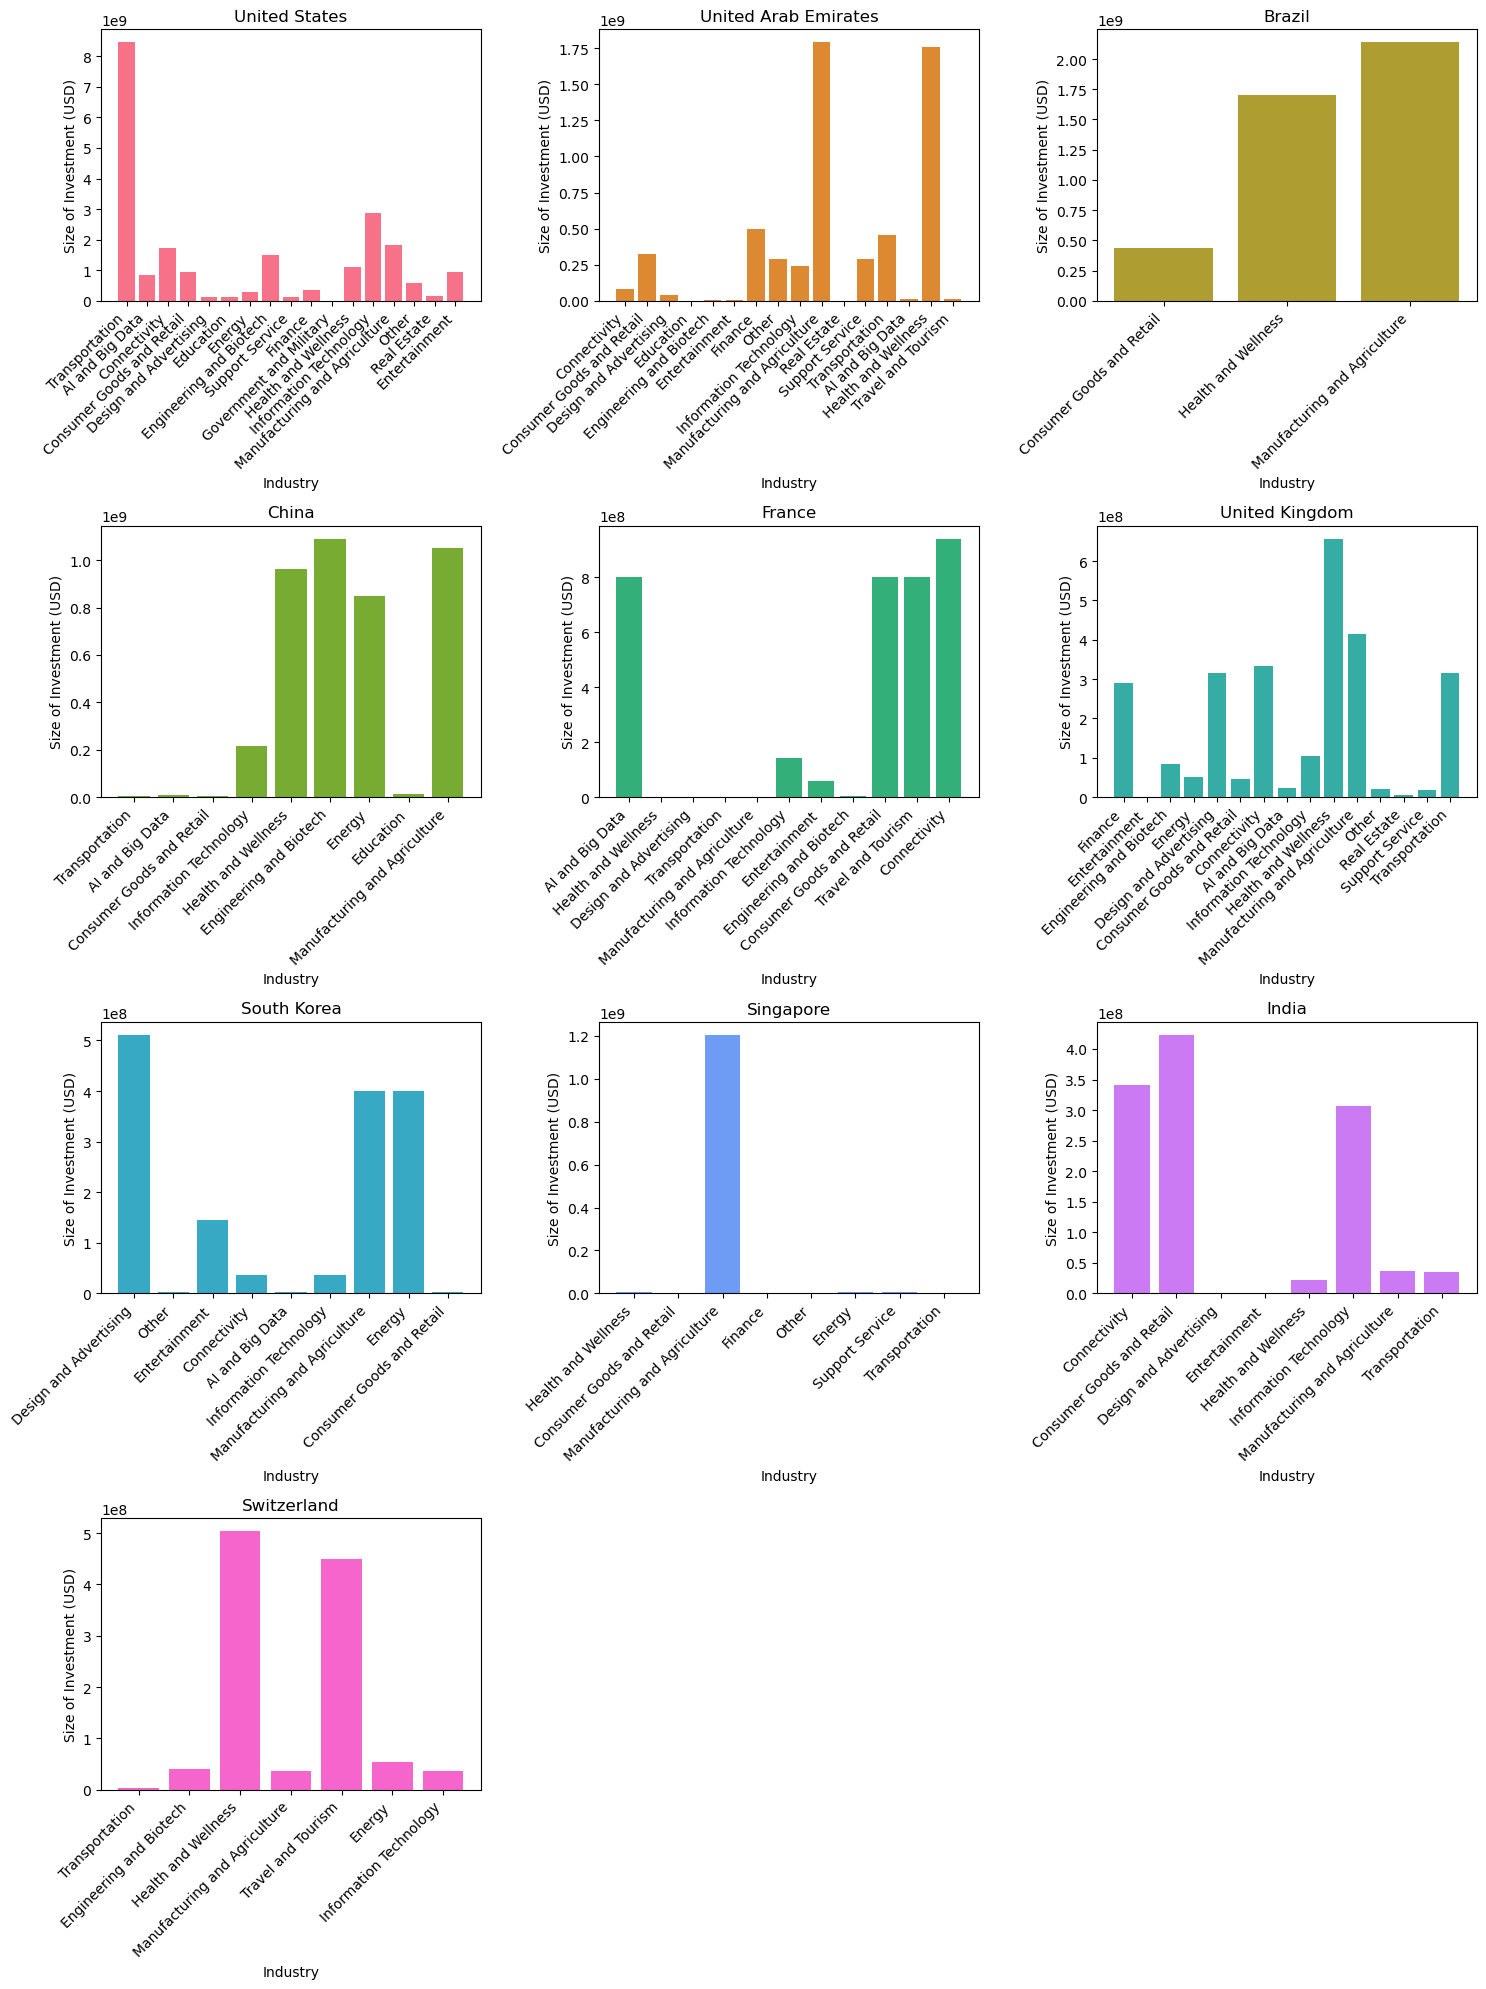

In [238]:
countries = set(glob_invest_per_cou['Country'])

# Generate a list of random colors
num_countries = len(countries)
palette = sns.color_palette("husl", num_countries)  # Use seaborn's "husl" palette

# Calculate the number of rows needed for 3 columns per row
num_cols = 3
num_rows = math.ceil(num_countries / num_cols)


fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Iterate over country_order to ensure the order of subplots
for ax, country, color in zip(axs.flatten(), country_order, palette):
    country_data = glob_invest_per_cou[glob_invest_per_cou['Country'] == country]
    ax.bar(country_data['17 Industry Categories'], country_data['Money Raised Normalized (Values in USD)'], color=color)
    ax.set_title(f'{country}')
    ax.set_xlabel('Industry')
    ax.set_ylabel('Size of Investment (USD)')
    ax.set_xticks(country_data['17 Industry Categories'])
    ax.set_xticklabels(country_data['17 Industry Categories'], rotation=45, ha='right')

for i in range(num_countries, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

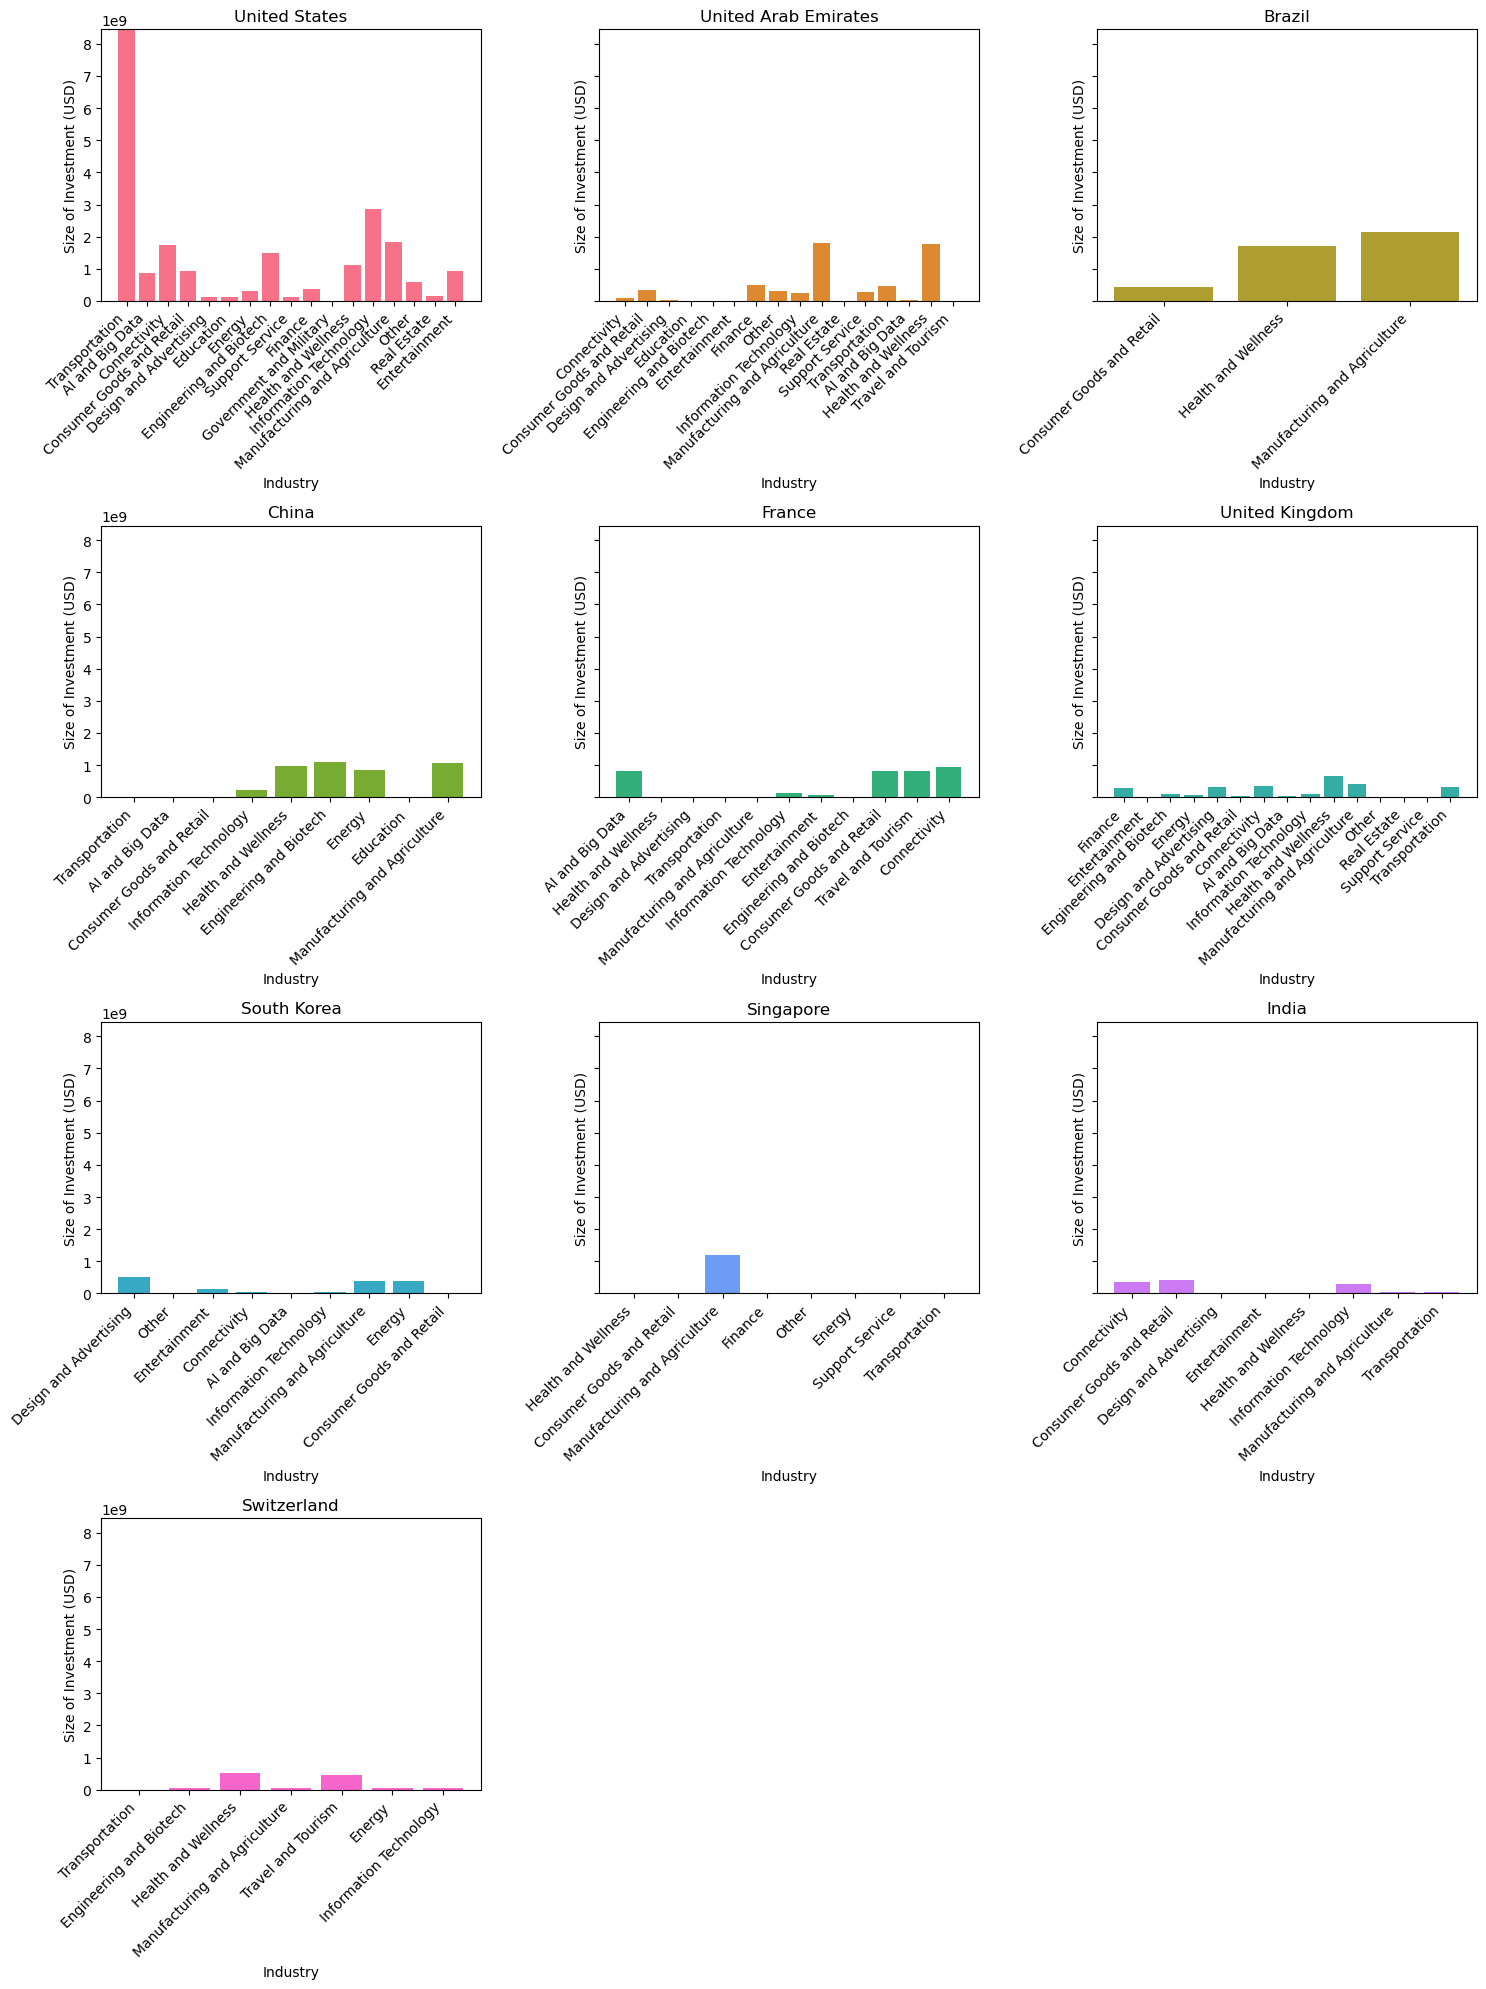

In [240]:
countries = set(glob_invest_per_cou['Country'])

# Generate a list of random colors
num_countries = len(countries)
palette = sns.color_palette("husl", num_countries)  # Use seaborn's "husl" palette

# Calculate the number of rows needed for 3 columns per row
num_cols = 3
num_rows = math.ceil(num_countries / num_cols)

max_value = glob_invest_per_cou['Money Raised Normalized (Values in USD)'].max()

# Create subplots following the order of country_order
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharey=True)

if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Iterate over country_order to ensure the order of subplots
for ax, country, color in zip(axs.flatten(), country_order, palette):
    country_data = glob_invest_per_cou[glob_invest_per_cou['Country'] == country]
    ax.bar(country_data['17 Industry Categories'], country_data['Money Raised Normalized (Values in USD)'], color=color)
    ax.set_title(f'{country}')
    ax.set_xlabel('Industry')
    ax.set_ylabel('Size of Investment (USD)')
    ax.set_xticks(country_data['17 Industry Categories'])
    ax.set_xticklabels(country_data['17 Industry Categories'], rotation=45, ha='right')
    ax.set_ylim(0, max_value)  # Set the same y-axis scale for all subplots

for i in range(num_countries, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
energy_invest_struc_glob = target_investment.explode("Industries_list")
energy_invest_struc_glob = energy_invest_struc_glob[energy_invest_struc_glob['Industries_list'].isin(['Energy', 'Renewable Energy', 'Solar'])]
energy_invest_struc_glob

In [162]:
energy_invest_size = energy_invest_struc_glob.groupby(['Domestic/Global','Industries_list'])['Money Raised Normalized (Values in USD)'].sum()
energy_invest_size = pd.DataFrame(energy_invest_size)
energy_invest_size

Money Raised Normalized (Values in USD)
Domestic/Global Industries_list                                          
Domestic        Energy                                       7.373464e+09
                Renewable Energy                             6.205035e+09
                Solar                                        5.000000e+05
Global          Energy                                       1.655171e+09
                Renewable Energy                             3.576780e+08
                Solar                                        2.106271e+07

In [ ]:
energy_invest_trend = energy_invest_struc_glob.groupby(['Announced Year','Industries_list'])['Money Raised Normalized (Values in USD)'].sum()
energy_invest_trend = pd.DataFrame(energy_invest_trend)
energy_invest_trend

In [ ]:
local_investment = target_investment[target_investment["Country"] == "Saudi Arabia"]
local_investment

In [ ]:
# Size of local Investment by city and industry categories

energy_invest_struc = local_investment.explode("Industries_list")
energy_invest_struc = energy_invest_struc[energy_invest_struc['Industries_list'].isin(['Solar', 'Energy', 'Renewable Energy'])]
energy_invest_struc


In [166]:
# Size of local investment

loc_invest_per_ind = local_investment.explode("17 Industry Categories")
loc_invest_per_ind = loc_invest_per_ind.groupby('17 Industry Categories')['Money Raised Normalized (Values in USD)'].sum()
loc_invest_per_ind = pd.DataFrame(loc_invest_per_ind)
loc_invest_per_ind = loc_invest_per_ind.reset_index()
loc_invest_per_ind

,17 Industry Categories,Money Raised Normalized (Values in USD)
0,AI and Big Data,2.676862e+09
1,Connectivity,5.948159e+08
2,Consumer Goods and Retail,2.596423e+09
3,Design and Advertising,3.891260e+07
4,Education,5.876833e+07
5,Energy,7.374979e+09
6,Engineering and Biotech,1.081341e+09
7,Entertainment,8.640933e+07
8,Finance,3.670669e+09
9,Government and Military,1.333333e+09


In [167]:
loc_invest_loc = Counter(local_investment['City'])
loc_invest_loc = pd.DataFrame(loc_invest_loc.items(), columns=['City', 'Number'])
loc_invest_loc

,City,Number
0,Riyadh,332
1,Jeddah,45
2,Medina,1
3,Thuwal,49
4,Mecca,19
5,Khobar,7
6,Dammam,15
7,Dhahran,2


In [168]:
# Size of local Investment by city and industry categories

loc_invest_per_ind_size = local_investment.explode("17 Industry Categories")
loc_invest_per_ind_size= loc_invest_per_ind_size.groupby(['City','17 Industry Categories'])['Money Raised Normalized (Values in USD)'].sum()
loc_invest_per_ind_size= pd.DataFrame(loc_invest_per_ind_size)
loc_invest_per_ind_size = loc_invest_per_ind_size.reset_index()
loc_invest_per_ind_size

,City,17 Industry Categories,Money Raised Normalized (Values in USD)
0,Dammam,Consumer Goods and Retail,1.230000e+07
1,Dammam,Education,5.866667e+06
2,Dammam,Engineering and Biotech,2.333333e+06
3,Dammam,Information Technology,2.333333e+06
4,Dammam,Manufacturing and Agriculture,2.333333e+06
...,...,...,...
77,Thuwal,Health and Wellness,1.699500e+06
78,Thuwal,Information Technology,5.681167e+06
79,Thuwal,Manufacturing and Agriculture,3.086050e+07
80,Thuwal,Real Estate,1.481000e+06


In [245]:
loc_invest_per_ind_size_excl = loc_invest_per_ind_size[loc_invest_per_ind_size['City'] != 'Riyadh']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cities = set(loc_invest_per_ind_size['City'])

# Generate a list of random colors
num_cities = len(cities)
palette = sns.color_palette("husl", num_cities)  # Use seaborn's "husl" palette

# Calculate the number of rows needed for 3 columns per row
num_cols = 3
num_rows = math.ceil(num_cities / num_cols)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axs array for easy iteration if there's more than one row
if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Plot data for each city
for ax, city, color in zip(axs, cities, palette):
    city_data = loc_invest_per_ind_size[loc_invest_per_ind_size['City'] == city]
    ax.bar(city_data['17 Industry Categories'], city_data['Money Raised Normalized (Values in USD)'], color=color)
    ax.set_title(f'{city}')
    ax.set_xlabel('Industry')
    ax.set_ylabel('Size of Investment')
    ax.set_xticks(city_data['17 Industry Categories'])
    ax.set_xticklabels(city_data['17 Industry Categories'], rotation=45, ha='right')

# Remove any unused subplots
for i in range(num_cities, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

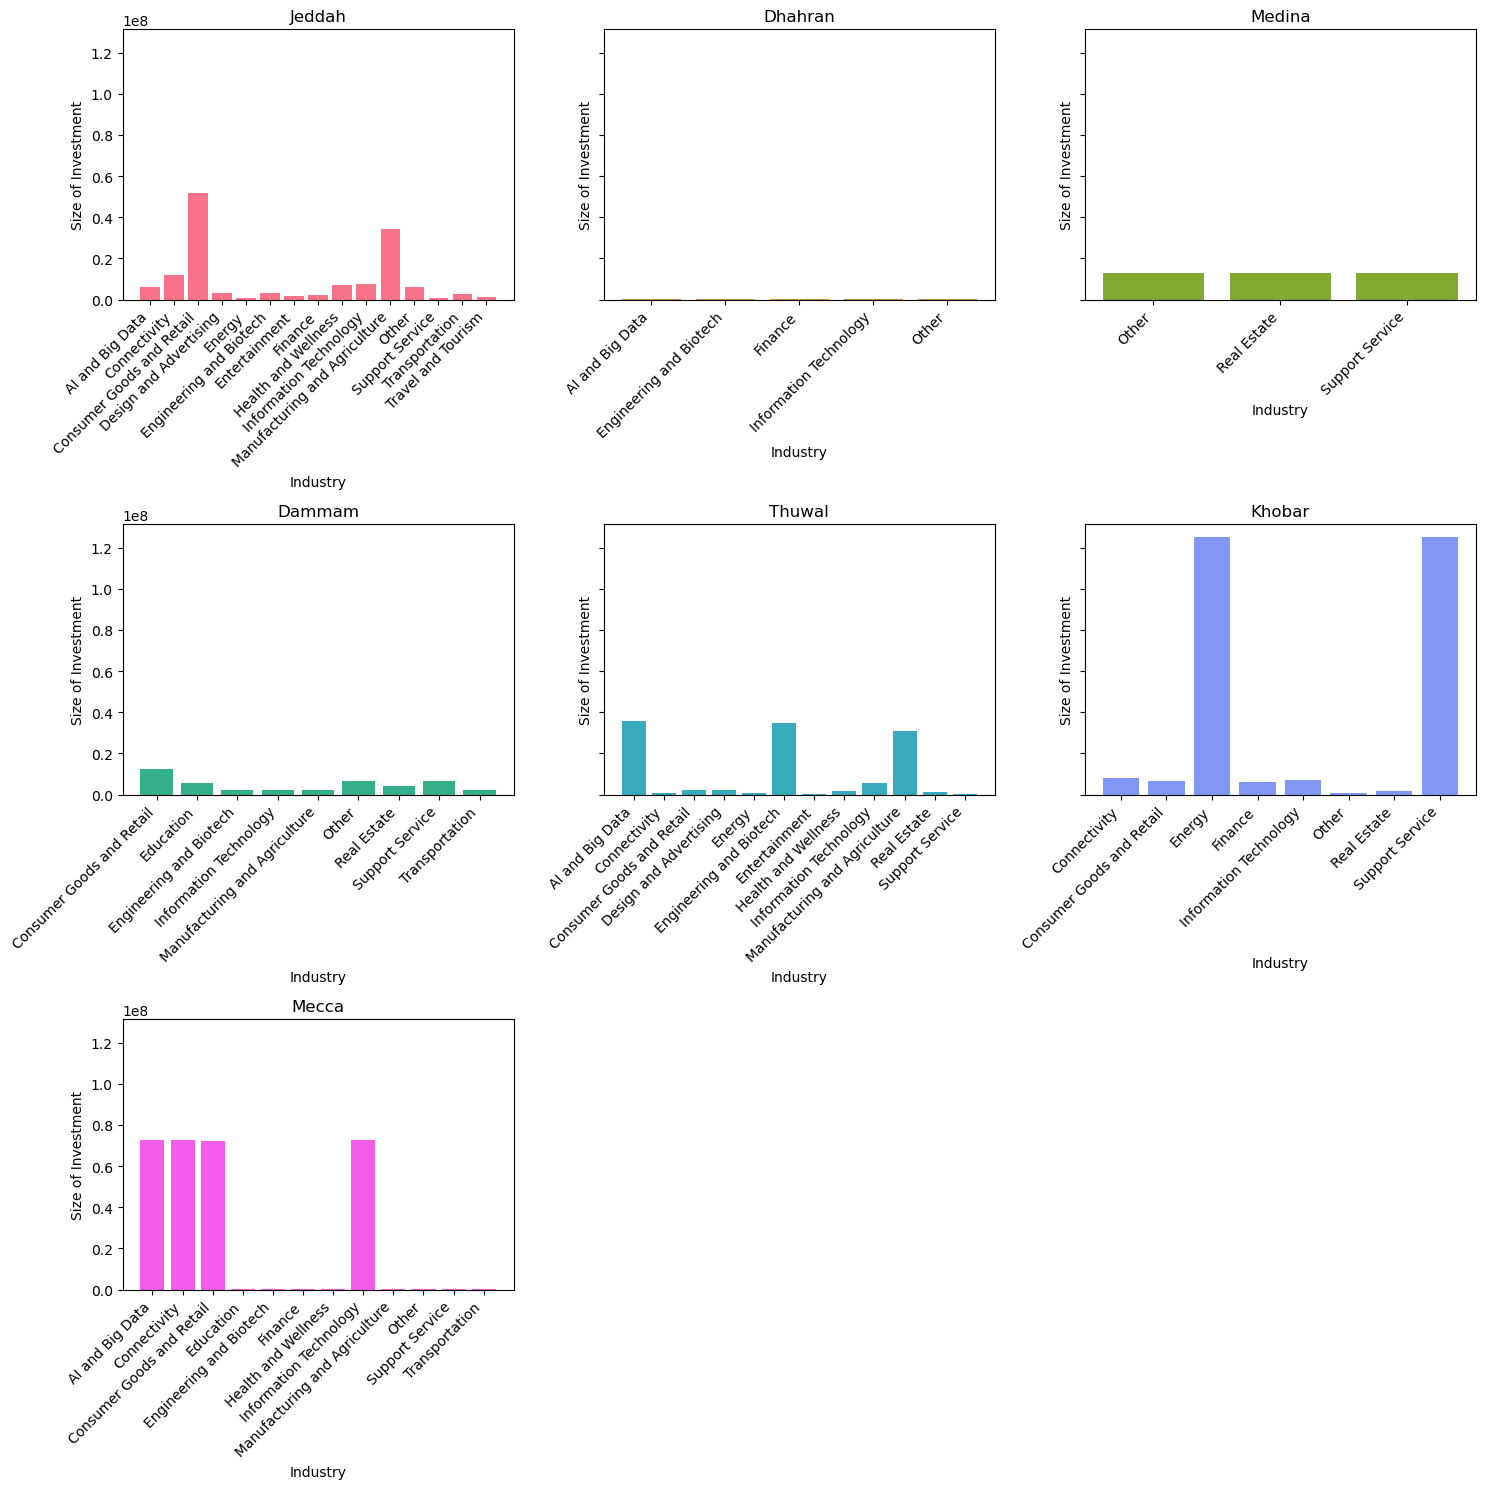

In [246]:
cities = set(loc_invest_per_ind_size_excl['City'])

# Generate a list of random colors
num_cities = len(cities)
palette = sns.color_palette("husl", num_cities)  # Use seaborn's "husl" palette

# Calculate the number of rows needed for 3 columns per row
num_cols = 3
num_rows = math.ceil(num_cities / num_cols)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharey=True)  # sharey=True shares the y-axis scale

# Flatten the axs array for easy iteration if there's more than one row
if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Calculate the maximum value across all subplots

# Plot data for each city
for ax, city, color in zip(axs, cities, palette):
    city_data = loc_invest_per_ind_size_excl[loc_invest_per_ind_size_excl['City'] == city]
    ax.bar(city_data['17 Industry Categories'], city_data['Money Raised Normalized (Values in USD)'], color=color)
    ax.set_title(f'{city}')
    ax.set_xlabel('Industry')
    ax.set_ylabel('Size of Investment')
    ax.set_xticks(city_data['17 Industry Categories'])
    ax.set_xticklabels(city_data['17 Industry Categories'], rotation=45, ha='right')


# Remove any unused subplots
for i in range(num_cities, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [170]:
def get_city_ind_table(citylist):    
    cities = citylist

    # Generate a list of random colors
    palette = sns.color_palette("husl", len(cities))  # Use seaborn's "husl" palette

    fig, axs = plt.subplots(len(cities), 1, figsize=(10, 5 * len(cities)))

    # If there's only one subplot, axs is not a list, so we make it a list for uniformity
    if len(cities) == 1:
        axs = [axs]

    # Plot data for each city
    for ax, city, color in zip(axs, cities, palette):
        city_data = loc_invest_per_ind_size[loc_invest_per_ind_size['City'] == city]
        ax.bar(city_data['17 Industry Categories'], city_data['Money Raised Normalized (Values in USD)'], color=color)
        ax.set_title(f'{city}')
        ax.set_xlabel('Industry')
        ax.set_ylabel('Size of Investment')
        ax.set_xticks(range(len(city_data['17 Industry Categories'])))
        ax.set_xticklabels(city_data['17 Industry Categories'], rotation=45, ha='right')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

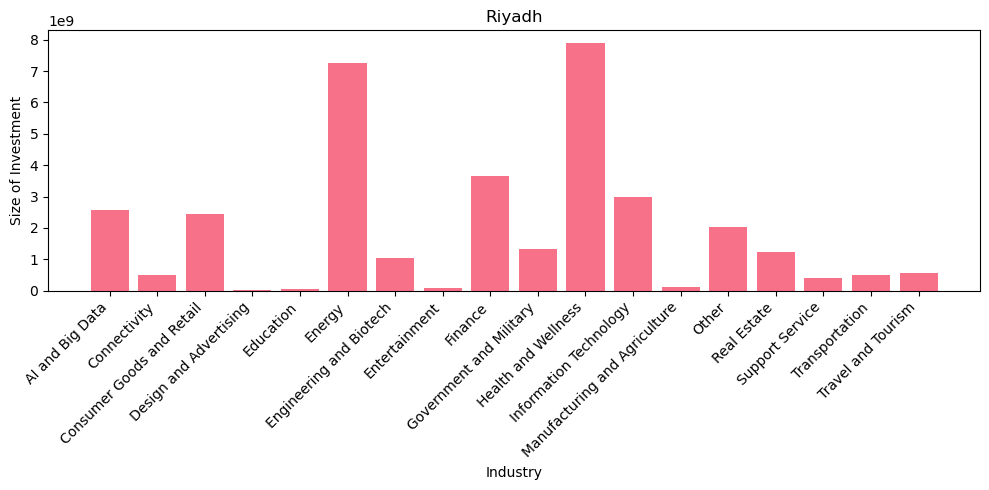

In [247]:
get_city_ind_table(['Riyadh'])

In [177]:
loc_energy_invest_trend = energy_invest_struc.groupby(['Announced Year','Industries_list'])['Money Raised Normalized (Values in USD)'].sum()
loc_energy_invest_trend = pd.DataFrame(loc_energy_invest_trend)
loc_energy_invest_trend = loc_energy_invest_trend.reset_index()
loc_energy_invest_trend

,Announced Year,Industries_list,Money Raised Normalized (Values in USD)
0,2016,Solar,5.000000e+05
1,2018,Renewable Energy,3.150000e+05
2,2019,Renewable Energy,7.000000e+05
3,2021,Energy,6.252000e+07
4,2021,Renewable Energy,6.252000e+07
5,2022,Energy,1.250000e+08
6,2023,Energy,1.105944e+09
7,2023,Renewable Energy,6.150000e+07
8,2024,Energy,6.080000e+09
9,2024,Renewable Energy,6.080000e+09


In [179]:
loc_energy_invest_trend_filled = loc_energy_invest_trend.pivot_table(index='Announced Year', columns='Industries_list', values='Money Raised Normalized (Values in USD)', fill_value=0)
loc_energy_invest_trend_filled.reset_index(inplace=True)
loc_energy_invest_trend_filled = loc_energy_invest_trend_filled.melt(id_vars='Announced Year', var_name='Industries_list', value_name='Money Raised Normalized (Values in USD)')
loc_energy_invest_trend_filled = pd.DataFrame(loc_energy_invest_trend_filled)
loc_energy_invest_trend_filled

,Announced Year,Industries_list,Money Raised Normalized (Values in USD)
0,2016,Energy,0.000000e+00
1,2018,Energy,0.000000e+00
2,2019,Energy,0.000000e+00
3,2021,Energy,6.252000e+07
4,2022,Energy,1.250000e+08
5,2023,Energy,1.105944e+09
6,2024,Energy,6.080000e+09
7,2016,Renewable Energy,0.000000e+00
8,2018,Renewable Energy,3.150000e+05
9,2019,Renewable Energy,7.000000e+05


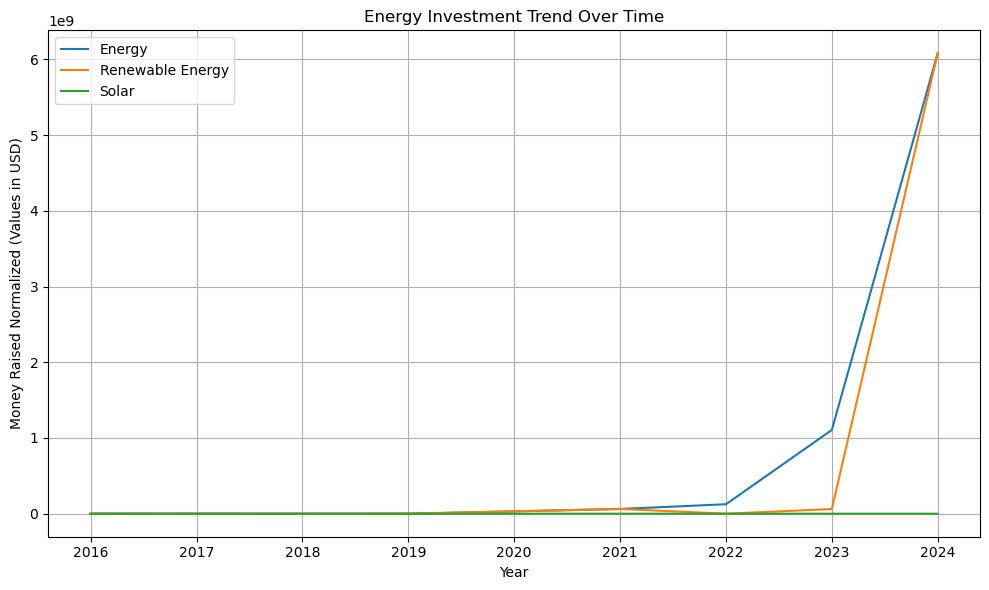

In [180]:
loc_energy_invest_trend_filled['Announced Year'] = pd.to_datetime(loc_energy_invest_trend_filled['Announced Year'], format='%Y')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over unique industries and plot each one
for industry in loc_energy_invest_trend_filled['Industries_list'].unique():
    industry_data = loc_energy_invest_trend_filled[loc_energy_invest_trend_filled['Industries_list'] == industry]
    plt.plot(industry_data['Announced Year'], industry_data['Money Raised Normalized (Values in USD)'], label=industry)

plt.title('Energy Investment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Money Raised Normalized (Values in USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()